<a href="https://colab.research.google.com/github/risacarvalho14/Task01/blob/main/Task01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction using supervised Machine Learning.**

## **Author - Risa Carvalho**

### In this Task 01 we will predict the percentage of marks that a student is expected to gain based upon the study hours.This problem is simple linear regression as it involves just the two variables.

In [31]:
#loading data from local drive 
from google.colab import files
uploaded = files.upload()

Saving Hours and scores.csv to Hours and scores (1).csv


In [ ]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df = pd.read_csv(io.BytesIO(uploaded['Hours and scores.csv']))


df.head(8)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


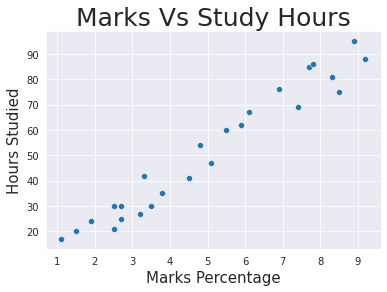

In [ ]:
#Plotting distribution of scores
sns.set_style('darkgrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Marks Vs Study Hours',size = 25)
plt.xlabel('Marks Percentage',size = 15)
plt.ylabel('Hours Studied',size = 15)
plt.show()


## **From the above scatterplot we can observe that there is correlation between 'Hours studied' and 'Percentage'.**

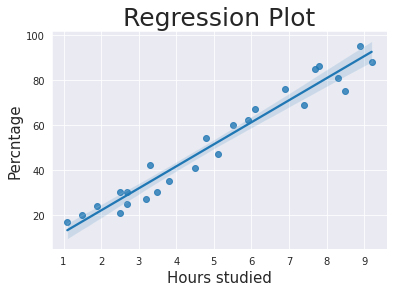

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x = df['Hours'],y = df['Scores'])
plt.title('Regression Plot',size = 25)
plt.xlabel('Hours studied',size = 15)
plt.ylabel('Percntage',size = 15)
plt.show()
print(df.corr())



# **Training Model**

In [ ]:
x = df.iloc[: , :-1].values
y = df.iloc[: , 1].values

#splitting data in two
train_x, val_x, train_y, val_y = train_test_split(x,y,random_state = 0)
regression = LinearRegression()

#Fitting the data 
regression.fit(train_x, train_y)
print('Training Done')



Training Done


# **Predicting the Percentage**

In [ ]:
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x],'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# **Comparing actual marks and Predicted marks**

In [ ]:
compare_scores = pd.DataFrame({'Actual Marks': val_y,'Predicted Marks': pred_y})
compare_scores


,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Graphically comparing Predicted and Actual marks

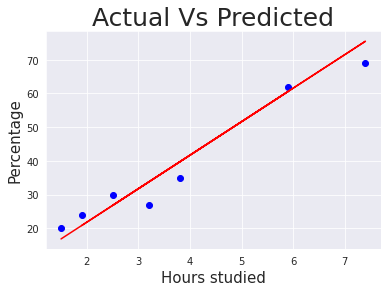

In [ ]:
plt.scatter(x=val_x, y=val_y,color ='blue')
plt.plot(val_x, pred_y,color = 'red')
plt.title('Actual Vs Predicted',size = 25)
plt.xlabel('Hours studied',size = 15)
plt.ylabel('Percentage',size = 15)
plt.show()


# **Evaluating the Model**

In [ ]:
#Calculae accuracy

print('Mean absolute error:',mean_absolute_error(val_y,pred_y))

Mean absolute error: 4.130879918502482


### **Since the Mean absolute error is small indicates that the possibility of inaccuracy of wrong estimation through an entire model are very few.**

# **What will be the predicted score of a student if he/she studies for 9.25 hrs/day?**

In [ ]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],2)))

Score = 93.89


## ***Hence according to this model,if a student studies for 9.25 hours/day then he/she is likely to score 93.89 % respectively.***